In [1]:
# !pip install pygraphviz
import networkx as nx
from myGAMDIV import *
from mycolors import *
from avalia import *
from LPA_Fuzzy_C import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from networkx.algorithms import community
from networkx.generators.community import planted_partition_graph
import itertools
from sklearn.metrics import accuracy_score
from fcmeans import FCM
from sklearn.mixture import GaussianMixture

In [2]:
k = 3
G2 = planted_partition_graph(k,1000,0.1,0.0001,seed=42)
groundTruth = [(node,data["block"]) for node,data in dict(G2.nodes.data()).items()]

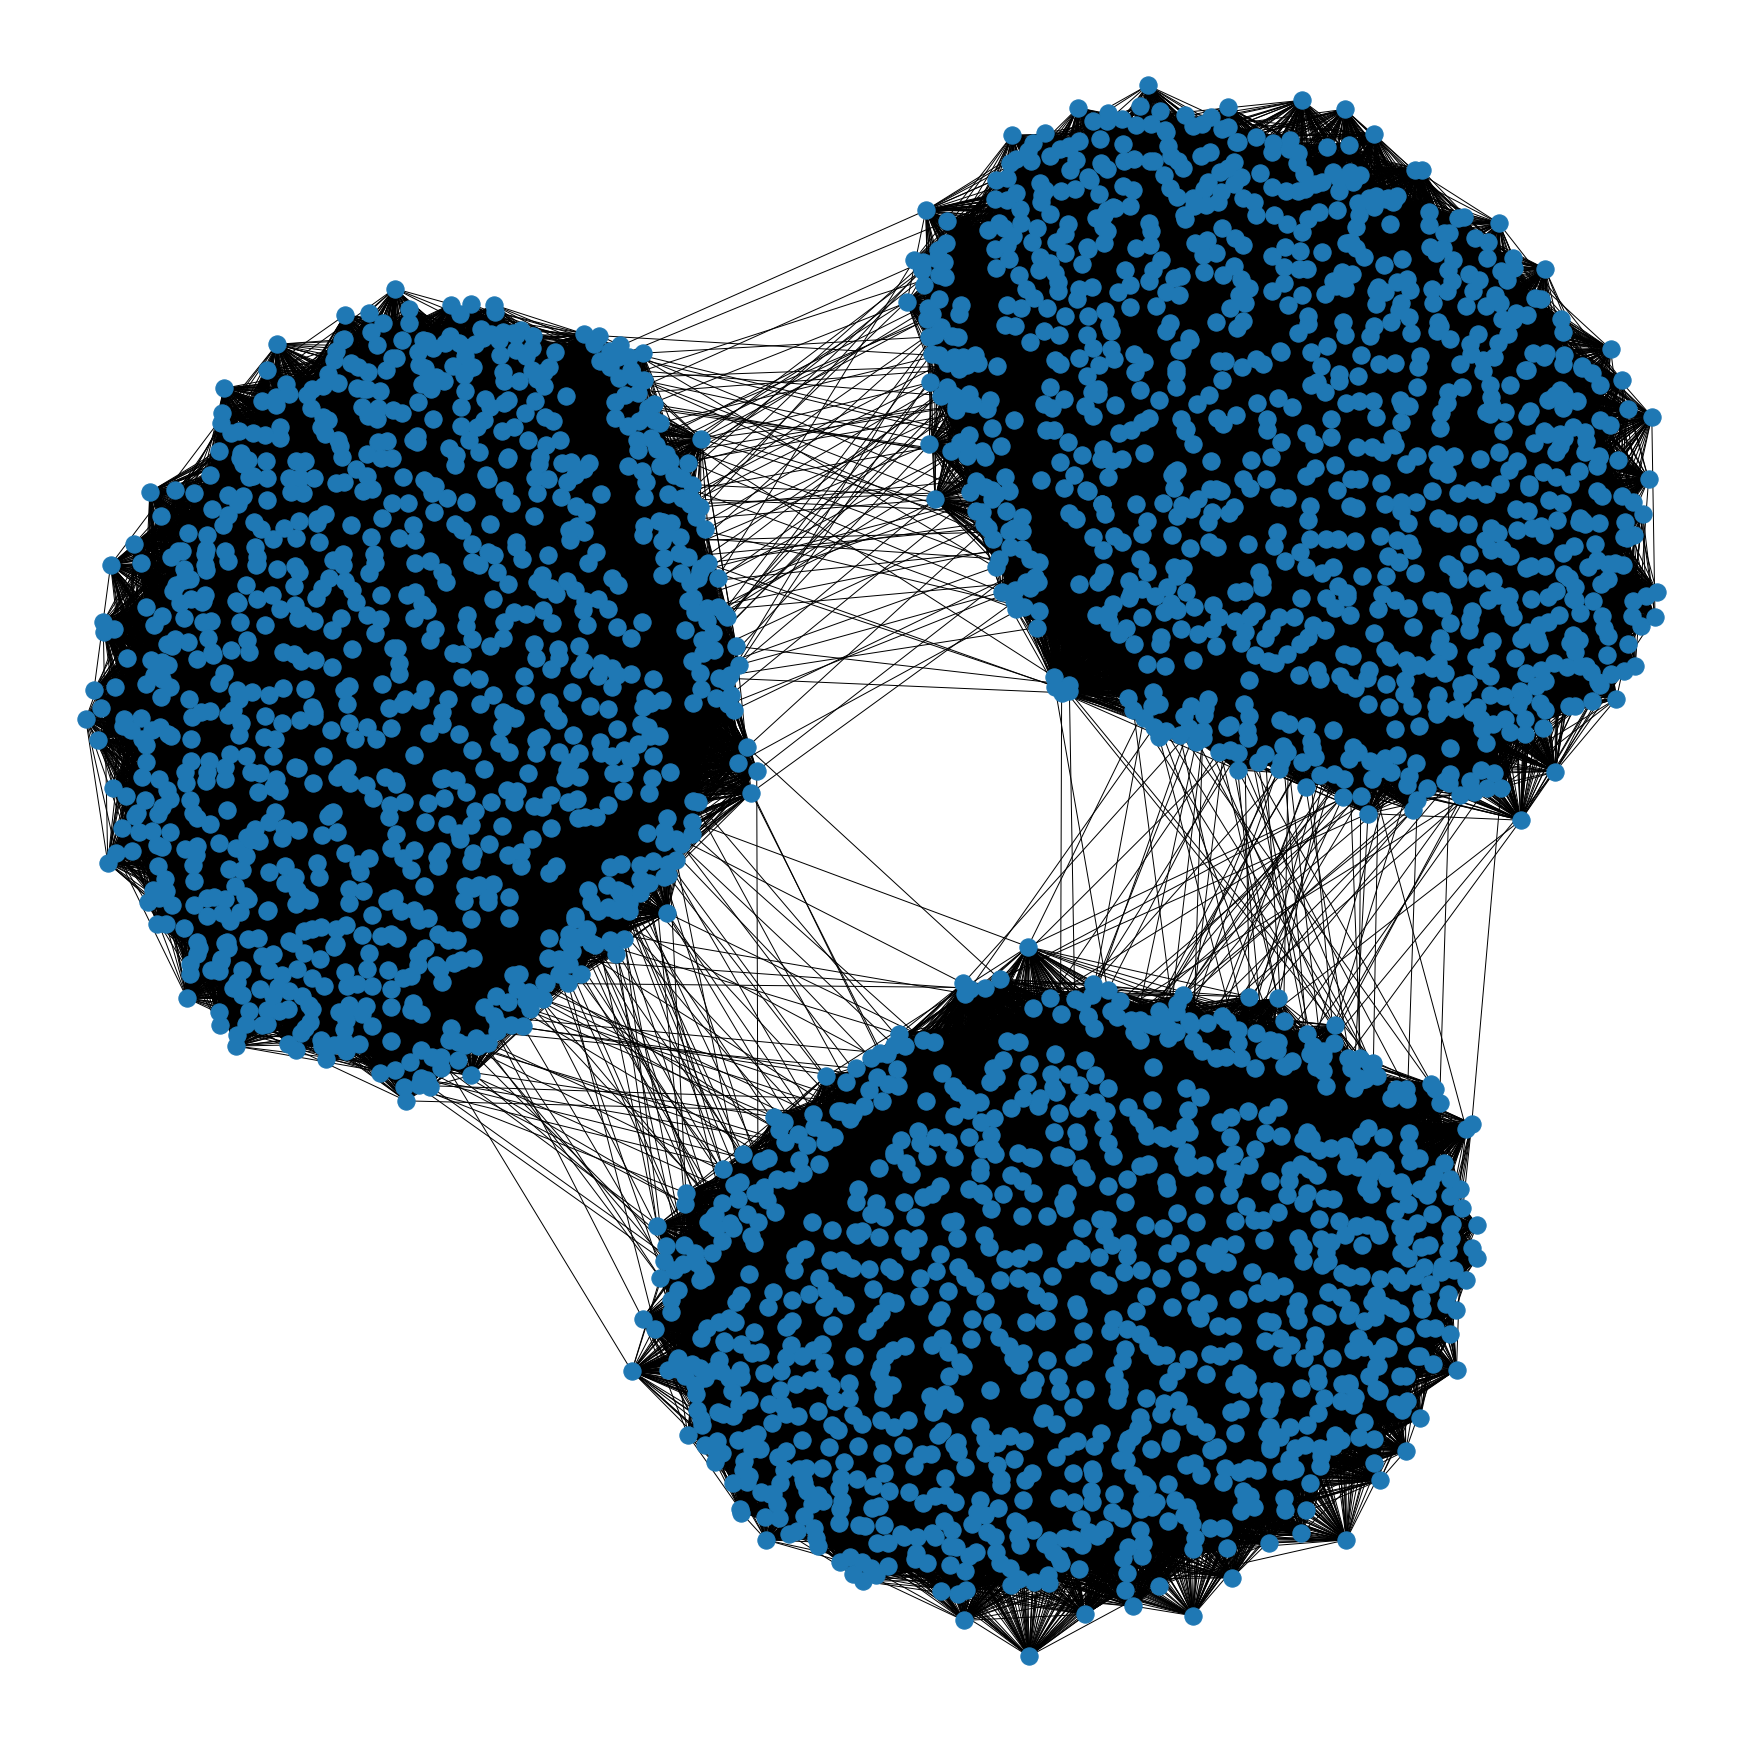

In [3]:
plt.figure(figsize=(24,24))
pos = nx.nx_agraph.graphviz_layout(G2)
nx.draw(G2,pos=pos)

In [4]:
def getBelongings(G):
    node_belonging = []
    for node in G.nodes():
        kin = total = 0
        node_community = G.nodes[node]["block"]
        for n in G.neighbors(node):
            total += 1
            if G.nodes[n]["block"] == node_community:
                kin += 1
        node_belonging.append(kin/total)
    return node_belonging

In [5]:
def makeTest(k_colors,mode,G,true_belongings,retry):
    true_labels = np.array(groundTruth)[:,1]
    l = myGAM(G,k_colors,0.001,maxiter=30,mode=mode,retry=retry)
    color_map = getColorMap(G,l,gist_rbw,string_format=False,consider_max=True)
    plt.figure(figsize=(16,16))
    nx.draw(G, node_color=color_map)
    if retry:
        plt.savefig(f"Retry_Teste_com_{k_colors}_labels_mode_{mode}_.png")
    else:
        plt.savefig(f"Teste_com_{k_colors}_labels_mode_{mode}_.png")
    plt.clf()
    structure_found = np.max(l,axis=1)
    plt.figure(figsize=(8,8))
    plt.scatter(node_belongings,structure_found)
    plt.xlabel("Pertencimento real")
    plt.ylabel("Pertencimento retornado pelo algoritmo")
    if retry:
        plt.savefig(f"Retry_Belongings_com_{k_colors}_labels_mode_{mode}_.png")
    else:
        plt.savefig(f"Belongings_com_{k_colors}_labels_mode_{mode}_.png")
    print(f"result of {k_colors}_labels_mode_{mode} in {len(np.unique(color_map))} labels")
    #print(f"result of {k_colors}_labels_mode_{mode} in {l.shape[1]} labels")
    plt.clf()
    return {'mode':mode,'acc':acc(l,true_labels),'k':k_colors,'retry':retry}

In [6]:
V = len(G2)
labels = np.zeros((V,3))
indexes = np.random.randint(0,3,size=V)
for index,col in enumerate(indexes):
	labels[index,col] = 1
acc(labels,np.array(groundTruth)[:,1])

0.3456666666666667

In [7]:
np.array(groundTruth)[:,1]

array([0, 0, 0, ..., 2, 2, 2])

In [8]:
node_belongings = getBelongings(G2)

In [9]:
np.min(node_belongings)

0.967391304347826

In [10]:
a = np.arange(0,8).reshape(4,2)

In [11]:
mask = np.column_stack([[0,1,2,3],[0,1,1,0]])

In [12]:
results = []
for mode in range(0,6):
    results.append(makeTest(len(G2),mode,G2,node_belongings,True))

Took 5 rounds

Took 31 rounds

result of 3000_labels_mode_0 in 3 labels
Took 6 rounds

Took 31 rounds

result of 3000_labels_mode_1 in 3 labels
Took 5 rounds

Took 31 rounds

result of 3000_labels_mode_2 in 3 labels
Took 7 rounds

Took 31 rounds

result of 3000_labels_mode_3 in 3 labels
Took 9 rounds

Took 10 rounds

result of 3000_labels_mode_4 in 3 labels
Took 5 rounds

Took 10 rounds

result of 3000_labels_mode_5 in 3 labels


<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [13]:
a = np.array([1,6,6,888,888,888])
np.unique(a,return_inverse=True)

(array([  1,   6, 888]), array([0, 1, 1, 2, 2, 2]))

In [14]:
for x in [k,len(G2)]:
    for mode in range(0,6):
        results.append(makeTest(x,mode,G2,node_belongings,False))

Took 7 rounds

result of 3_labels_mode_0 in 2 labels
Took 5 rounds

result of 3_labels_mode_1 in 3 labels
Took 8 rounds

result of 3_labels_mode_2 in 3 labels
Took 31 rounds

result of 3_labels_mode_3 in 3 labels
Took 5 rounds

result of 3_labels_mode_4 in 3 labels
Took 4 rounds

result of 3_labels_mode_5 in 3 labels
Took 5 rounds

result of 3000_labels_mode_0 in 1 labels
Took 6 rounds

result of 3000_labels_mode_1 in 1 labels
Took 5 rounds

result of 3000_labels_mode_2 in 1 labels
Took 7 rounds

result of 3000_labels_mode_3 in 1 labels
Took 9 rounds



<ipython-input-5-efeacdecbb22>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,16))


result of 3000_labels_mode_4 in 1 labels
Took 5 rounds

result of 3000_labels_mode_5 in 1 labels


<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [15]:
df_results = pd.DataFrame(results)

In [16]:
df_results

,mode,acc,k,retry
0,0,1.000000,3000,True
1,1,1.000000,3000,True
2,2,1.000000,3000,True
3,3,1.000000,3000,True
4,4,1.000000,3000,True
5,5,1.000000,3000,True
6,0,0.666667,3,False
7,1,1.000000,3,False
8,2,1.000000,3,False
9,3,1.000000,3,False


# Acurácia sem reinicialização

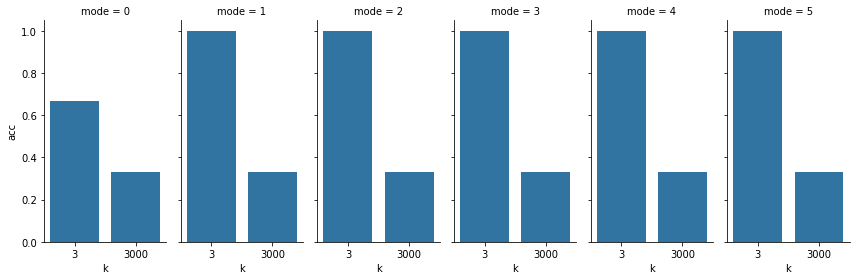

In [20]:
g = sns.FacetGrid(df_results[df_results['retry'] == False][['acc','mode','k']], col="mode", height=4, aspect=.5)
g.map(sns.barplot, "k", "acc",order=[3,3000])

# Acurácia dada a inicialização K = V

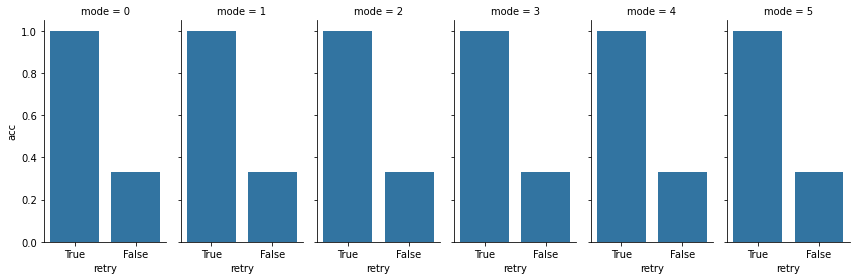

In [21]:
g = sns.FacetGrid(df_results[df_results['k'] == 3000][['acc','mode','retry']], col="mode", height=4, aspect=.5)
g.map(sns.barplot, "retry", "acc",order=[True,False])

In [22]:
def func(x):
    return np.max([1 - x/5,0])
transform_dist = np.vectorize(func)

In [23]:
dist = LPA_Fuzzy_C(G2,0,5)

In [24]:
dist_transformed = transform_dist(dist)

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

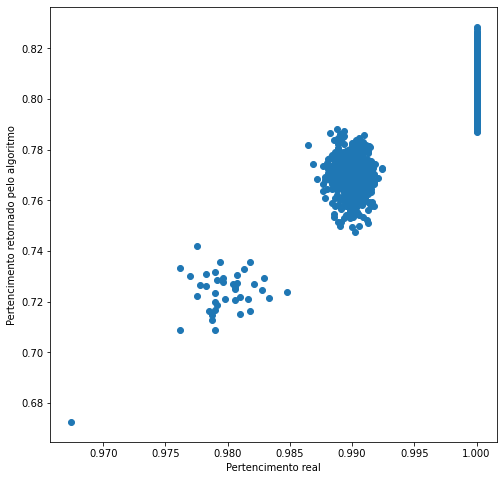

In [25]:
fcm = FCM(n_clusters=k)
fcm.fit(dist_transformed)
# plot result
soft_labels = fcm.soft_predict(dist_transformed)
structure_found = np.max(soft_labels,axis=1)
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")

In [26]:
true_labels = np.array(groundTruth)[:,1]
acc(soft_labels,true_labels)

1.0

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

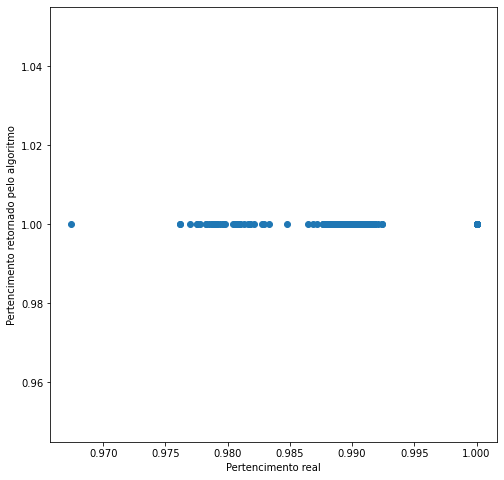

In [27]:
model = GaussianMixture(n_components=k,covariance_type='full')
model.fit(dist_transformed)
gmm_labels = model.predict_proba(dist_transformed)
structure_found = np.max(gmm_labels,axis=1)
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")

In [28]:
acc(gmm_labels,true_labels)

1.0